In [3]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image
from IPython.display import display
import warnings

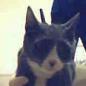

In [4]:
# check dataset 
with Image.open('train_images/CATS_DOGS/test/CAT/10107.JPG') as img:
    display(img)

### Create a list of image filenames

In [5]:
# Suppress the specific warning
warnings.filterwarnings("ignore", message=".*Truncated File Read.*")

path = "train_images/CATS_DOGS/"
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

print(len(img_names))

24994


### Create a DataFrame of image sizes (width x height)

In [6]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)

print(f"Images: {len(img_sizes)}")
print(f"Rejected: {len(rejected)}")

Images: 24994
Rejected: 0


In [7]:
# convert the list to a pd.DataFrame
df = pd.DataFrame(img_sizes)

# run summary statistics on image widths
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [8]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

### Image Preprocessing
The incoming image files 
